### Max Validation score= 0.85(randomized search)

In [1120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, Normalizer, PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from xgboost import XGBClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import QuantileTransformer
from sklearn.feature_selection import chi2
from sklearn.linear_model import RidgeClassifier, SGDClassifier
from sklearn.svm import LinearSVC, SVC
from lightgbm import LGBMClassifier
from statsmodels.api import qqplot, graphics, ProbPlot
from statsmodels.stats import anova, contingency_tables, descriptivestats, outliers_influence
from statsmodels.tools import categorical, transform_model

In [1124]:
pf=PolynomialFeatures(degree=4)
f=pf.fit_transform(train[['Fare']])

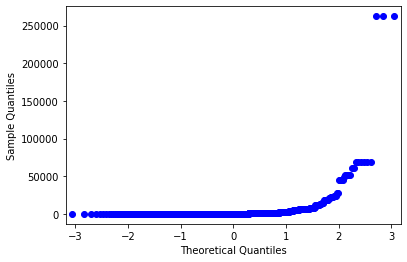

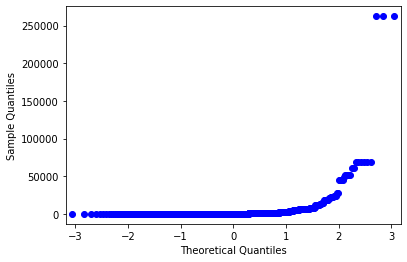

In [1134]:
qqplot(pd.DataFrame(f)[2])

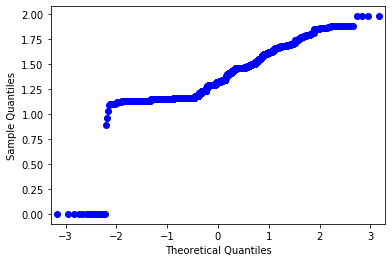

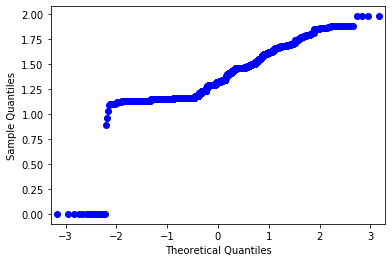

In [1211]:
qqplot(np.log(train['Fare']+1))

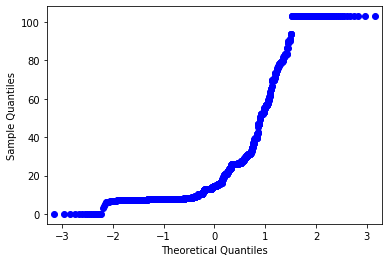

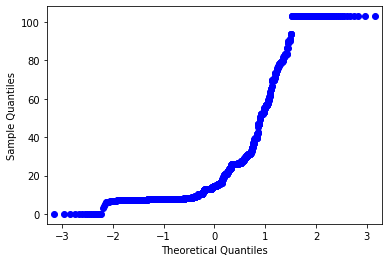

In [1213]:
qqplot(titanic['Out_Fare'])

In [1271]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
titanic=pd.concat([train, test])

In [1272]:
titanic.Age=titanic.Age.fillna(titanic.Age.median())
titanic.Fare=titanic.Fare.fillna(titanic.Fare.median())
titanic.Embarked=titanic.Embarked.fillna(titanic.Embarked.mode()[0]).map({'S':0, 'C':1, 'Q':2})
titanic.Sex=titanic.Sex.map({'male':0, 'female':1})

In [918]:
titanic.Embarked.unique()

array([0, 1, 2], dtype=int64)

In [900]:
val, p=chi2(train['Age'].fillna(train['Age'].median()).values.reshape(-1,1), train['Survived'])

In [1273]:
val, p=chi2(train['Fare'].fillna(train['Fare'].median()).values.reshape(-1,1), train['Survived'])
p

array([0.])

In [1274]:
titanic['New_Fare']=np.log(titanic['Fare']+1)

In [920]:
titanic.Fare.describe()

count    1309.000000
mean       33.281086
std        51.741500
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: Fare, dtype: float64

In [1220]:
pd.qcut(titanic['Fare'], q=3)

0      (-0.001, 8.0]
1      (26.0, 512.0]
2      (-0.001, 8.0]
3      (26.0, 512.0]
4      (-0.001, 8.0]
           ...      
413    (-0.001, 8.0]
414    (26.0, 512.0]
415    (-0.001, 8.0]
416    (-0.001, 8.0]
417      (8.0, 26.0]
Name: Fare, Length: 1309, dtype: category
Categories (3, interval[float64]): [(-0.001, 8.0] < (8.0, 26.0] < (26.0, 512.0]]

In [1219]:
pd.qcut(titanic['Age'], q=3)

0      (0.169, 25.0]
1       (30.5, 80.0]
2       (25.0, 30.5]
3       (30.5, 80.0]
4       (30.5, 80.0]
           ...      
413     (25.0, 30.5]
414     (30.5, 80.0]
415     (30.5, 80.0]
416     (25.0, 30.5]
417     (25.0, 30.5]
Name: Age, Length: 1309, dtype: category
Categories (3, interval[float64]): [(0.169, 25.0] < (25.0, 30.5] < (30.5, 80.0]]

In [1218]:
pd.cut(titanic['Fare'], bins=4)

0      (-0.512, 128.0]
1      (-0.512, 128.0]
2      (-0.512, 128.0]
3      (-0.512, 128.0]
4      (-0.512, 128.0]
            ...       
413    (-0.512, 128.0]
414    (-0.512, 128.0]
415    (-0.512, 128.0]
416    (-0.512, 128.0]
417    (-0.512, 128.0]
Name: Fare, Length: 1309, dtype: category
Categories (4, interval[float64]): [(-0.512, 128.0] < (128.0, 256.0] < (256.0, 384.0] < (384.0, 512.0]]

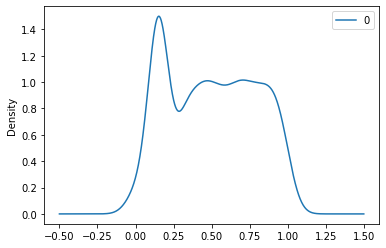

In [890]:
pd.DataFrame(QuantileTransformer(n_quantiles=100).fit_transform(titanic['Fare'].values.reshape(-1,1))).plot.kde()

In [1275]:
def outliers(data, features):
    for features in cont_feats:
        q1,q2,q3=np.quantile(data[features], [0.25,0.5,0.75])
        print('quantile {0} is {1}, quantile {0} is {2}, quantile {0} is {3}'.format(features, q1,q2,q3))
        iqr=q3-q1
        print('iqr of {0} is {1}'.format(features, iqr))
        lb, ub= (q1-(1.5*iqr), q3+(1.5*iqr))
        print('lower bond of {0} is {1}, upper bound of {0} is {2}'.format(features, lb, ub))
        lB, uB= (q1-(3*iqr), q3+(3*iqr))
        print('lower bond of {0} is {1}, upper bound of {0} is {2}'.format(features, lB, uB))

In [1276]:
cont_feats=['Age', 'Fare']

In [1277]:
outliers(titanic, cont_feats)

quantile Age is 22.0, quantile Age is 28.0, quantile Age is 35.0
iqr of Age is 13.0
lower bond of Age is 2.5, upper bound of Age is 54.5
lower bond of Age is -17.0, upper bound of Age is 74.0
quantile Fare is 7.8958, quantile Fare is 14.4542, quantile Fare is 31.275
iqr of Fare is 23.379199999999997
lower bond of Fare is -27.172999999999995, upper bound of Fare is 66.34379999999999
lower bond of Fare is -62.24179999999999, upper bound of Fare is 101.4126


In [1278]:
titanic['Out_Age']=titanic['Age'].copy()
titanic['Out_Fare']=titanic['Fare'].copy()

In [1279]:
titanic.loc[titanic['Out_Age']>74, 'Out_Age']=74

In [1280]:
titanic.loc[titanic['Out_Fare']>103, 'Out_Fare']=103

In [1252]:
pd.qcut(titanic['Age'], q=5)

ValueError: Bin edges must be unique: array([ 0.17, 21.  , 28.  , 28.  , 39.  , 80.  ]).
You can drop duplicate edges by setting the 'duplicates' kwarg

In [1253]:
pd.qcut(titanic['Fare'], q=5)

0      (-0.001, 7.0]
1      (41.0, 512.0]
2      (-0.001, 7.0]
3      (41.0, 512.0]
4        (7.0, 10.0]
           ...      
413      (7.0, 10.0]
414    (41.0, 512.0]
415    (-0.001, 7.0]
416      (7.0, 10.0]
417     (21.0, 41.0]
Name: Fare, Length: 1309, dtype: category
Categories (5, interval[float64]): [(-0.001, 7.0] < (7.0, 10.0] < (10.0, 21.0] < (21.0, 41.0] < (41.0, 512.0]]

In [1250]:
titanic.loc[titanic['Fare']<=7, 'Fare_band']=0
titanic.loc[(titanic['Fare']>7) & (titanic['Fare']<=10), 'Fare_band']=1
titanic.loc[(titanic['Fare']>10) & (titanic['Fare']<=21), 'Fare_band']=2
titanic.loc[(titanic['Fare']>21) & (titanic['Fare']<=41), 'Fare_band']=3
titanic.loc[(titanic['Fare']>41) & (titanic['Fare']<=512), 'Fare_band']=4

In [1231]:
titanic.loc[titanic['Age']<=25, 'Age_band1']=1
titanic.loc[(titanic['Age']>25) & (titanic['Age']<=30.5), 'Age_band1']=2
titanic.loc[(titanic['Age']>30.5) & (titanic['Age']<=80), 'Age_band1']=3

In [1240]:
titanic.loc[titanic['Fare']<=8, 'Fare_band1']=1
titanic.loc[(titanic['Fare']>8) & (titanic['Fare']<=26), 'Fare_band1']=2
titanic.loc[(titanic['Fare']>26) & (titanic['Fare']<=512), 'Fare_band1']=3

In [1222]:
titanic.loc[titanic['Age']<=22, 'Age_band']=0
titanic.loc[(titanic['Age']>22) & (titanic['Age']<=28), 'Age_band']=1
titanic.loc[(titanic['Age']>28) & (titanic['Age']<=35), 'Age_band']=2
titanic.loc[(titanic['Age']>35) & (titanic['Age']<=80), 'Age_band']=3

In [1223]:
titanic.loc[titanic['Fare']<=7.896, 'Fare_band']=0
titanic.loc[(titanic['Fare']>7.896) & (titanic['Fare']<=14.454), 'Fare_band']=1
titanic.loc[(titanic['Fare']>14.454) & (titanic['Fare']<=31.275), 'Fare_band']=2
titanic.loc[(titanic['Fare']>31.275) & (titanic['Fare']<=512.330), 'Fare_band']=3

In [799]:
titanic[titanic['Age_band'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,New_Fare,Out_Age,Out_Fare,Age_band,Fare_band


In [1224]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,New_Fare,Out_Age,Out_Fare,Age_band,Fare_band,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7,0,0,2.11,22.0,7.2500,0.0,0.0,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71,1,1,4.28,38.0,71.2833,3.0,3.0,3
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7,0,0,2.19,26.0,7.9250,1.0,0.0,2
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53,1,0,3.99,35.0,53.1000,2.0,3.0,3
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8,0,0,2.20,35.0,8.0500,2.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",0,28.0,0,0,A.5. 3236,8,0,0,2.20,28.0,8.0500,1.0,1.0,1
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,PC 17758,108,1,1,4.70,39.0,103.0000,3.0,3.0,3
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",0,38.5,0,0,SOTON/O.Q. 3101262,7,0,0,2.11,38.5,7.2500,3.0,0.0,1
416,1308,NaN,3,"Ware, Mr. Frederick",0,28.0,0,0,359309,8,0,0,2.20,28.0,8.0500,1.0,1.0,1


In [1327]:
titanic['Title']=titanic.Name.str.extract('([A-Za-z]+)\.')

In [1328]:
titanic['Title']=LabelEncoder().fit_transform(titanic['Title'])

In [1329]:
titanic['Title']=titanic['Title'].replace({13:1, 10:2, 14:3})

In [1330]:
titanic['Title'].loc[titanic['Title']>3]=3

D:\AI\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [1318]:
titanic['Cabin']=np.where(titanic['Cabin'].isnull(), 0,1)

In [945]:
titanic['Cabin'].value_counts()

0    1014
1     295
Name: Cabin, dtype: int64

In [946]:
titanic['Fare']=titanic['Fare'].astype(int)

In [947]:
titanic['New_Fare']=np.around(titanic['New_Fare'],2)

In [1289]:
titanic['Age_Pclass']=titanic['Age']*titanic['Pclass']

In [1293]:
titanic['Is_alone']=np.where((titanic['SibSp']+titanic['Parch'])==0,0,1)

In [1346]:
t1=titanic.drop(['PassengerId', 'Survived', 'Name', 'Ticket'], axis=1)
t1

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,New_Fare,Out_Age,Out_Fare,Age_Pclass,Is_alone,Title
0,3,0,22.0,1,0,7.2500,0,0,2.110213,22.0,7.2500,66.0,1,1
1,1,1,38.0,1,0,71.2833,1,1,4.280593,38.0,71.2833,38.0,1,3
2,3,1,26.0,0,0,7.9250,0,0,2.188856,26.0,7.9250,78.0,0,2
3,1,1,35.0,1,0,53.1000,1,0,3.990834,35.0,53.1000,35.0,1,3
4,3,0,35.0,0,0,8.0500,0,0,2.202765,35.0,8.0500,105.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,0,28.0,0,0,8.0500,0,0,2.202765,28.0,8.0500,84.0,0,1
414,1,1,39.0,0,0,108.9000,1,1,4.699571,39.0,103.0000,39.0,0,3
415,3,0,38.5,0,0,7.2500,0,0,2.110213,38.5,7.2500,115.5,0,1
416,3,0,28.0,0,0,8.0500,0,0,2.202765,28.0,8.0500,84.0,0,1


In [1345]:
t1=pd.get_dummies(t1, 
                  columns=[ 'Sex', 'Embarked'], 
                  drop_first=True)

In [1333]:
t1=t1.drop([ 'Age', 'Fare'], axis=1)


In [1304]:
t1

,Pclass,SibSp,Parch,New_Fare,Out_Age,Out_Fare,Age_Pclass,Is_alone,Sex_0,Sex_1,Embarked_0,Embarked_1,Embarked_2
0,3,1,0,2.110213,22.0,7.2500,66.0,1,1,0,1,0,0
1,1,1,0,4.280593,38.0,71.2833,38.0,1,0,1,0,1,0
2,3,0,0,2.188856,26.0,7.9250,78.0,0,0,1,1,0,0
3,1,1,0,3.990834,35.0,53.1000,35.0,1,0,1,1,0,0
4,3,0,0,2.202765,35.0,8.0500,105.0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,0,0,2.202765,28.0,8.0500,84.0,0,1,0,1,0,0
414,1,0,0,4.699571,39.0,103.0000,39.0,0,0,1,0,1,0
415,3,0,0,2.110213,38.5,7.2500,115.5,0,1,0,1,0,0
416,3,0,0,2.202765,28.0,8.0500,84.0,0,1,0,1,0,0


In [1347]:
X=t1[:891]
x=t1[891:]
y=train['Survived']

In [1348]:
X_train, X_val, y_train, y_val=train_test_split(X,y, test_size=0.2, random_state=0)

In [1246]:
log=LogisticRegression(solver='newton-cg')
rf=RandomForestClassifier()
ab=AdaBoostClassifier()
xg=XGBClassifier()
gp=GaussianProcessClassifier()
bn=BernoulliNB()
gn=GaussianNB()
lda=LinearDiscriminantAnalysis()
qda=QuadraticDiscriminantAnalysis()
knn=KNeighborsClassifier()
rc=RidgeClassifier()
sg=SGDClassifier()
lsv=LinearSVC()
sv=SVC()

In [1349]:
log.fit(X_train, y_train)
rf.fit(X_train, y_train)
ab.fit(X_train, y_train)
xg.fit(X_train, y_train)
gp.fit(X_train, y_train)
bn.fit(X_train, y_train)
gn.fit(X_train, y_train)
lda.fit(X_train, y_train)
qda.fit(X_train, y_train)
knn.fit(X_train, y_train)
rc.fit(X_train, y_train)
sg.fit(X_train, y_train)
lsv.fit(X_train, y_train)
sv.fit(X_train, y_train)


print('log:',log.score(X_train, y_train))
print('rf:',rf.score(X_train, y_train))
print('ab:',ab.score(X_train, y_train))
print('xg:',xg.score(X_train, y_train))
print('gp', gp.score(X_train, y_train))
print('bn', bn.score(X_train, y_train))
print('gn', gn.score(X_train, y_train))
print('lda', lda.score(X_train, y_train))
print('qda', qda.score(X_train, y_train))
print('knn', knn.score(X_train, y_train))
print('rc', rc.score(X_train, y_train))
print('sg', sg.score(X_train, y_train))
print('lsv', lsv.score(X_train, y_train))
print('sv', sv.score(X_train, y_train))

D:\AI\lib\site-packages\sklearn\discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
D:\AI\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\AI\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


log: 0.8300561797752809
rf: 0.9775280898876404
ab: 0.8455056179775281
xg: 0.9803370786516854
gp 0.9634831460674157
bn 0.7626404494382022
gn 0.776685393258427
lda 0.8258426966292135
qda 0.6376404494382022
knn 0.8019662921348315
rc 0.827247191011236
sg 0.6179775280898876
lsv 0.7991573033707865
sv 0.9157303370786517


In [1350]:
print('log:',log.score(X_val, y_val))
print('rf:',rf.score(X_val, y_val))
print('ab:',ab.score(X_val, y_val))
print('xg:',xg.score(X_val, y_val))
print('gp:',gp.score(X_val, y_val))
print('bn:',bn.score(X_val, y_val))
print('gn:',gn.score(X_val, y_val))
print('lda:',lda.score(X_val, y_val))
print('qda:',qda.score(X_val, y_val))
print('knn:',knn.score(X_val, y_val))
print('rc:',rc.score(X_val, y_val))
print('sg:',sg.score(X_val, y_val))
print('lsv:',lsv.score(X_val, y_val))
print('sv:',sv.score(X_val, y_val))

log: 0.8212290502793296
rf: 0.8100558659217877
ab: 0.8100558659217877
xg: 0.8268156424581006
gp: 0.7262569832402235
bn: 0.776536312849162
gn: 0.8268156424581006
lda: 0.7988826815642458
qda: 0.6480446927374302
knn: 0.7318435754189944
rc: 0.7988826815642458
sg: 0.6201117318435754
lsv: 0.7877094972067039
sv: 0.6536312849162011


In [317]:
X=pd.get_dummies(X, columns=['Sex', 'Embarked'], drop_first=True)

In [318]:
x=pd.get_dummies(x, columns=['Sex', 'Embarked'], drop_first=True)

In [53]:
X=X.drop('New_Fare', axis=1)

In [419]:
X

,Age,SibSp,Parch,Fare,New_Fare,Age_band,Fare_band,New_SibSp,New_Parch,Pclass_2,Pclass_3,Sex_1,Embarked_1,Embarked_2
0,22.0,1,0,7.2500,2.110213,1.0,1.0,1.0,0.0,0,1,0,0,0
1,38.0,1,0,71.2833,4.280593,4.0,4.0,1.0,0.0,0,0,1,1,0
2,26.0,0,0,7.9250,2.188856,2.0,2.0,0.0,0.0,0,1,1,0,0
3,35.0,1,0,53.1000,3.990834,3.0,4.0,1.0,0.0,0,0,1,0,0
4,35.0,0,0,8.0500,2.202765,3.0,2.0,0.0,0.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.0,0,0,13.0000,2.639057,2.0,2.0,0.0,0.0,1,0,0,0,0
887,19.0,0,0,30.0000,3.433987,1.0,3.0,0.0,0.0,0,0,1,0,0
888,28.0,1,2,23.4500,3.196630,2.0,3.0,1.0,2.0,0,1,1,0,0
889,26.0,0,0,30.0000,3.433987,2.0,3.0,0.0,0.0,0,0,0,1,0


In [209]:
X.shape, x.shape

((891, 11), (418, 11))

In [320]:
X_train, X_val, y_train, y_val=train_test_split(X,y, test_size=0.2, random_state=0)

In [440]:
x[X.columns]

,Age,SibSp,Parch,Fare,New_Fare,Pclass_2,Pclass_3,Sex_1,Embarked_1,Embarked_2,Age_band_2.0,Age_band_3.0,Age_band_4.0,Fare_band_2.0,Fare_band_3.0,Fare_band_4.0,New_SibSp_1.0,New_SibSp_2.0,New_Parch_1.0,New_Parch_2.0
0,34.5,0,0,7.8292,2.178064,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0
1,47.0,1,0,7.0000,2.079442,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0
2,62.0,0,0,9.6875,2.369075,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0
3,27.0,0,0,8.6625,2.268252,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0
4,22.0,1,1,12.2875,2.586824,0,1,1,0,0,0,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,28.0,0,0,8.0500,2.202765,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0
414,39.0,0,0,108.9000,4.699571,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0
415,38.5,0,0,7.2500,2.110213,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
416,28.0,0,0,8.0500,2.202765,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0


In [197]:
param_dist=dict(n_estimators=np.arange(100,1000,100), max_depth=np.arange(1,10,1), criterion=['gini', 'entropy'])

In [198]:
rs=RandomizedSearchCV(estimator=rf, param_distributions=param_dist, cv=5, verbose=10, scoring='accuracy')

In [1180]:
rs.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=100, max_depth=5, criterion=entropy ................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=100, max_depth=5, criterion=entropy, score=0.804, total=   0.2s
[CV] n_estimators=100, max_depth=5, criterion=entropy ................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  n_estimators=100, max_depth=5, criterion=entropy, score=0.860, total=   0.2s
[CV] n_estimators=100, max_depth=5, criterion=entropy ................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s


[CV]  n_estimators=100, max_depth=5, criterion=entropy, score=0.811, total=   0.2s
[CV] n_estimators=100, max_depth=5, criterion=entropy ................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.6s remaining:    0.0s


[CV]  n_estimators=100, max_depth=5, criterion=entropy, score=0.796, total=   0.3s
[CV] n_estimators=100, max_depth=5, criterion=entropy ................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.9s remaining:    0.0s


[CV]  n_estimators=100, max_depth=5, criterion=entropy, score=0.865, total=   0.2s
[CV] n_estimators=600, max_depth=9, criterion=entropy ................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.1s remaining:    0.0s


[CV]  n_estimators=600, max_depth=9, criterion=entropy, score=0.790, total=   1.4s
[CV] n_estimators=600, max_depth=9, criterion=entropy ................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    2.5s remaining:    0.0s


[CV]  n_estimators=600, max_depth=9, criterion=entropy, score=0.874, total=   1.4s
[CV] n_estimators=600, max_depth=9, criterion=entropy ................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    3.9s remaining:    0.0s


[CV]  n_estimators=600, max_depth=9, criterion=entropy, score=0.818, total=   1.3s
[CV] n_estimators=600, max_depth=9, criterion=entropy ................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    5.2s remaining:    0.0s


[CV]  n_estimators=600, max_depth=9, criterion=entropy, score=0.803, total=   1.3s
[CV] n_estimators=600, max_depth=9, criterion=entropy ................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    6.5s remaining:    0.0s


[CV]  n_estimators=600, max_depth=9, criterion=entropy, score=0.823, total=   1.3s
[CV] n_estimators=500, max_depth=7, criterion=gini ...................
[CV]  n_estimators=500, max_depth=7, criterion=gini, score=0.797, total=   1.0s
[CV] n_estimators=500, max_depth=7, criterion=gini ...................
[CV]  n_estimators=500, max_depth=7, criterion=gini, score=0.881, total=   1.1s
[CV] n_estimators=500, max_depth=7, criterion=gini ...................
[CV]  n_estimators=500, max_depth=7, criterion=gini, score=0.811, total=   1.0s
[CV] n_estimators=500, max_depth=7, criterion=gini ...................
[CV]  n_estimators=500, max_depth=7, criterion=gini, score=0.796, total=   1.0s
[CV] n_estimators=500, max_depth=7, criterion=gini ...................
[CV]  n_estimators=500, max_depth=7, criterion=gini, score=0.844, total=   1.0s
[CV] n_estimators=300, max_depth=9, criterion=entropy ................
[CV]  n_estimators=300, max_depth=9, criterion=entropy, score=0.790, total=   0.7s
[CV] n_e

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   56.9s finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators=10,
                                                    n_jobs=None,
  

In [1181]:
rs.score(X_train, y_train)

0.851123595505618

In [1182]:
rs.score(X_val, y_val)

0.8212290502793296

In [1183]:
print(accuracy_score(y_val, rs.predict(X_val)))
print(classification_report(y_val, rs.predict(X_val)))
print(confusion_matrix(y_val, rs.predict(X_val)))

0.8212290502793296
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       110
           1       0.79      0.72      0.76        69

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.82      0.82      0.82       179

[[97 13]
 [19 50]]


In [1184]:
pd.DataFrame(rs.predict(x))[0].value_counts()

0    266
1    152
Name: 0, dtype: int64

In [1288]:
pd.DataFrame(xg.predict(x))[0].value_counts()

0    274
1    144
Name: 0, dtype: int64

In [254]:
pd.DataFrame(dict(Survived= rs.predict(x)), index=test['PassengerId']).to_csv(r'.\Desktop\rs_tnew1_op.csv')

In [108]:
pd.DataFrame(dict(Survived= rs.predict(x)), index=test['PassengerId']).to_pickle(r'.\Desktop\rs_titan_op.pkl')

In [89]:
test.Fare1=test.Fare.fillna(test.Fare.median())

D:\AI\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [92]:
test['Fare1']=test['Fare']

In [95]:
x=pd.concat([x, test['Fare1']], axis=1)

In [104]:
x

,Age,SibSp,Parch,Fare,New_Fare,Fare1,Sex_1,Pclass_2,Pclass_3,Embarked_1,Embarked_2
0,34.5,0,0,1.0,2.178064,7.8292,0,0,1,0,1
1,47.0,1,0,1.0,2.079442,7.0000,1,0,1,0,0
2,62.0,0,0,2.0,2.369075,9.6875,0,1,0,0,1
3,27.0,0,0,2.0,2.268252,8.6625,0,0,1,0,0
4,22.0,1,1,2.0,2.586824,12.2875,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
413,28.0,0,0,2.0,2.202765,8.0500,0,0,1,0,0
414,39.0,0,0,4.0,4.699571,108.9000,1,0,0,1,0
415,38.5,0,0,1.0,2.110213,7.2500,0,0,1,0,0
416,28.0,0,0,2.0,2.202765,8.0500,0,0,1,0,0


In [112]:
op_pkl=pd.read_pickle(r'.\Desktop\rs_titan_op.pkl')

In [113]:
op_pkl.value_counts()

Survived
1           380
0            38
dtype: int64

In [114]:
38/(380+38)

0.09090909090909091

In [115]:
y.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [118]:
pd.DataFrame(rs.predict(x)).value_counts()

1    380
0     38
dtype: int64

In [122]:
pd.DataFrame(rf.predict(x)).value_counts()

1    334
0     84
dtype: int64

In [125]:
pd.DataFrame(log.predict(x)).value_counts()

1    416
0      2
dtype: int64

(418, 11)

In [135]:
X=t1[:891]
x=t1[891:]

In [140]:
X=pd.concat([X, train['Fare1']], axis=1)

In [144]:
x=pd.concat([x, test['Fare1']], axis=1)

In [158]:
pd.read_csv(r'.\Desktop\rs_titan_op.csv')['Survived'].value_counts()

1    380
0     38
Name: Survived, dtype: int64

In [160]:
pd.DataFrame(dict(Survived= rs.predict(x)), index=test['PassengerId']).value_counts()

Survived
0           286
1           132
dtype: int64

In [161]:
pd.read_pickle('X_titanic.pkl')

,Age,SibSp,Parch,Fare,Fare1,Sex_1,Pclass_2,Pclass_3,Embarked_1,Embarked_2
0,22.0,1,0,1.0,7.2500,0,0,1,0,0
1,38.0,1,0,4.0,71.2833,1,0,0,1,0
2,26.0,0,0,2.0,7.9250,1,0,1,0,0
3,35.0,1,0,4.0,53.1000,1,0,0,0,0
4,35.0,0,0,2.0,8.0500,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
886,27.0,0,0,2.0,13.0000,0,1,0,0,0
887,19.0,0,0,3.0,30.0000,1,0,0,0,0
888,28.0,1,2,3.0,23.4500,1,0,1,0,0
889,26.0,0,0,3.0,30.0000,0,0,0,1,0


In [162]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,New_Fare,Fare1
0,3,0,22.0,1,0,1.0,0,2.110213,7.2500
1,1,1,38.0,1,0,4.0,1,4.280593,71.2833
2,3,1,26.0,0,0,2.0,0,2.188856,7.9250
3,1,1,35.0,1,0,4.0,0,3.990834,53.1000
4,3,0,35.0,0,0,2.0,0,2.202765,8.0500
...,...,...,...,...,...,...,...,...,...
886,2,0,27.0,0,0,2.0,0,2.639057,13.0000
887,1,1,19.0,0,0,3.0,0,3.433987,30.0000
888,3,1,28.0,1,2,3.0,0,3.196630,23.4500
889,1,0,26.0,0,0,3.0,1,3.433987,30.0000
